# Loading Images

Images for this project are acquired in a Leica Stellaris microscope and saved as .lif.
Each file might contain more than a single image.
Each image has several channels and z-stacks as well.


In [1]:
from pathlib import Path
from aicsimageio import AICSImage

Installing AICSImageIO with readlif is a good option to load these kind of files with all the emtadata. Let's peep through the different scenes that have been saved in this file and print their size and name so that we can get an idea on which we should try out our different loader.

In [2]:
DATA_DIR = Path("../data")
filepath = DATA_DIR / "20231025_p1_cd13_opn_arl13b.lif"

In [3]:
file = AICSImage(filepath)

You can list all the images inside the file like this.

In [4]:
for scene in file.scenes:
    file.set_scene(scene)
    print(f"{scene}: with shape {file.dims}")

pos1_snapshot: with shape <Dimensions [T: 1, C: 5, Z: 1, Y: 1024, X: 1024]>
pos1_zstack: with shape <Dimensions [T: 1, C: 5, Z: 178, Y: 1024, X: 1024]>
pos2_heart: with shape <Dimensions [T: 1, C: 5, Z: 1, Y: 2048, X: 2048]>
pos2_heart2: with shape <Dimensions [T: 1, C: 5, Z: 1, Y: 2048, X: 2048]>
pos2_snapshot: with shape <Dimensions [T: 1, C: 5, Z: 1, Y: 2048, X: 2048]>
pos2_zstack: with shape <Dimensions [T: 1, C: 5, Z: 138, Y: 1024, X: 1024]>
pos3_snapshot: with shape <Dimensions [T: 1, C: 5, Z: 1, Y: 2048, X: 2048]>
pos3_zstack: with shape <Dimensions [T: 1, C: 5, Z: 180, Y: 1024, X: 1024]>
pos4_zstack: with shape <Dimensions [T: 1, C: 5, Z: 99, Y: 1024, X: 1024]>
pos5_zstack: with shape <Dimensions [T: 1, C: 5, Z: 190, Y: 1024, X: 1024]>


Let's go for ```pos2_zstack``` , load it and check that the shape and everything is working correctly.

In [5]:
file.set_scene("pos2_zstack")

In [6]:
file.dask_data

dask.array<transpose, shape=(1, 5, 138, 1024, 1024), dtype=uint8, chunksize=(1, 1, 138, 1024, 1024), chunktype=numpy.ndarray>

If you work with dask data, the image is not loaded into memmory. This is quite convenient and fast. You can even give this to Napari and Napari will handle the loading and showing.

c:\Users\agucor\Anaconda3\envs\morphocilia\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


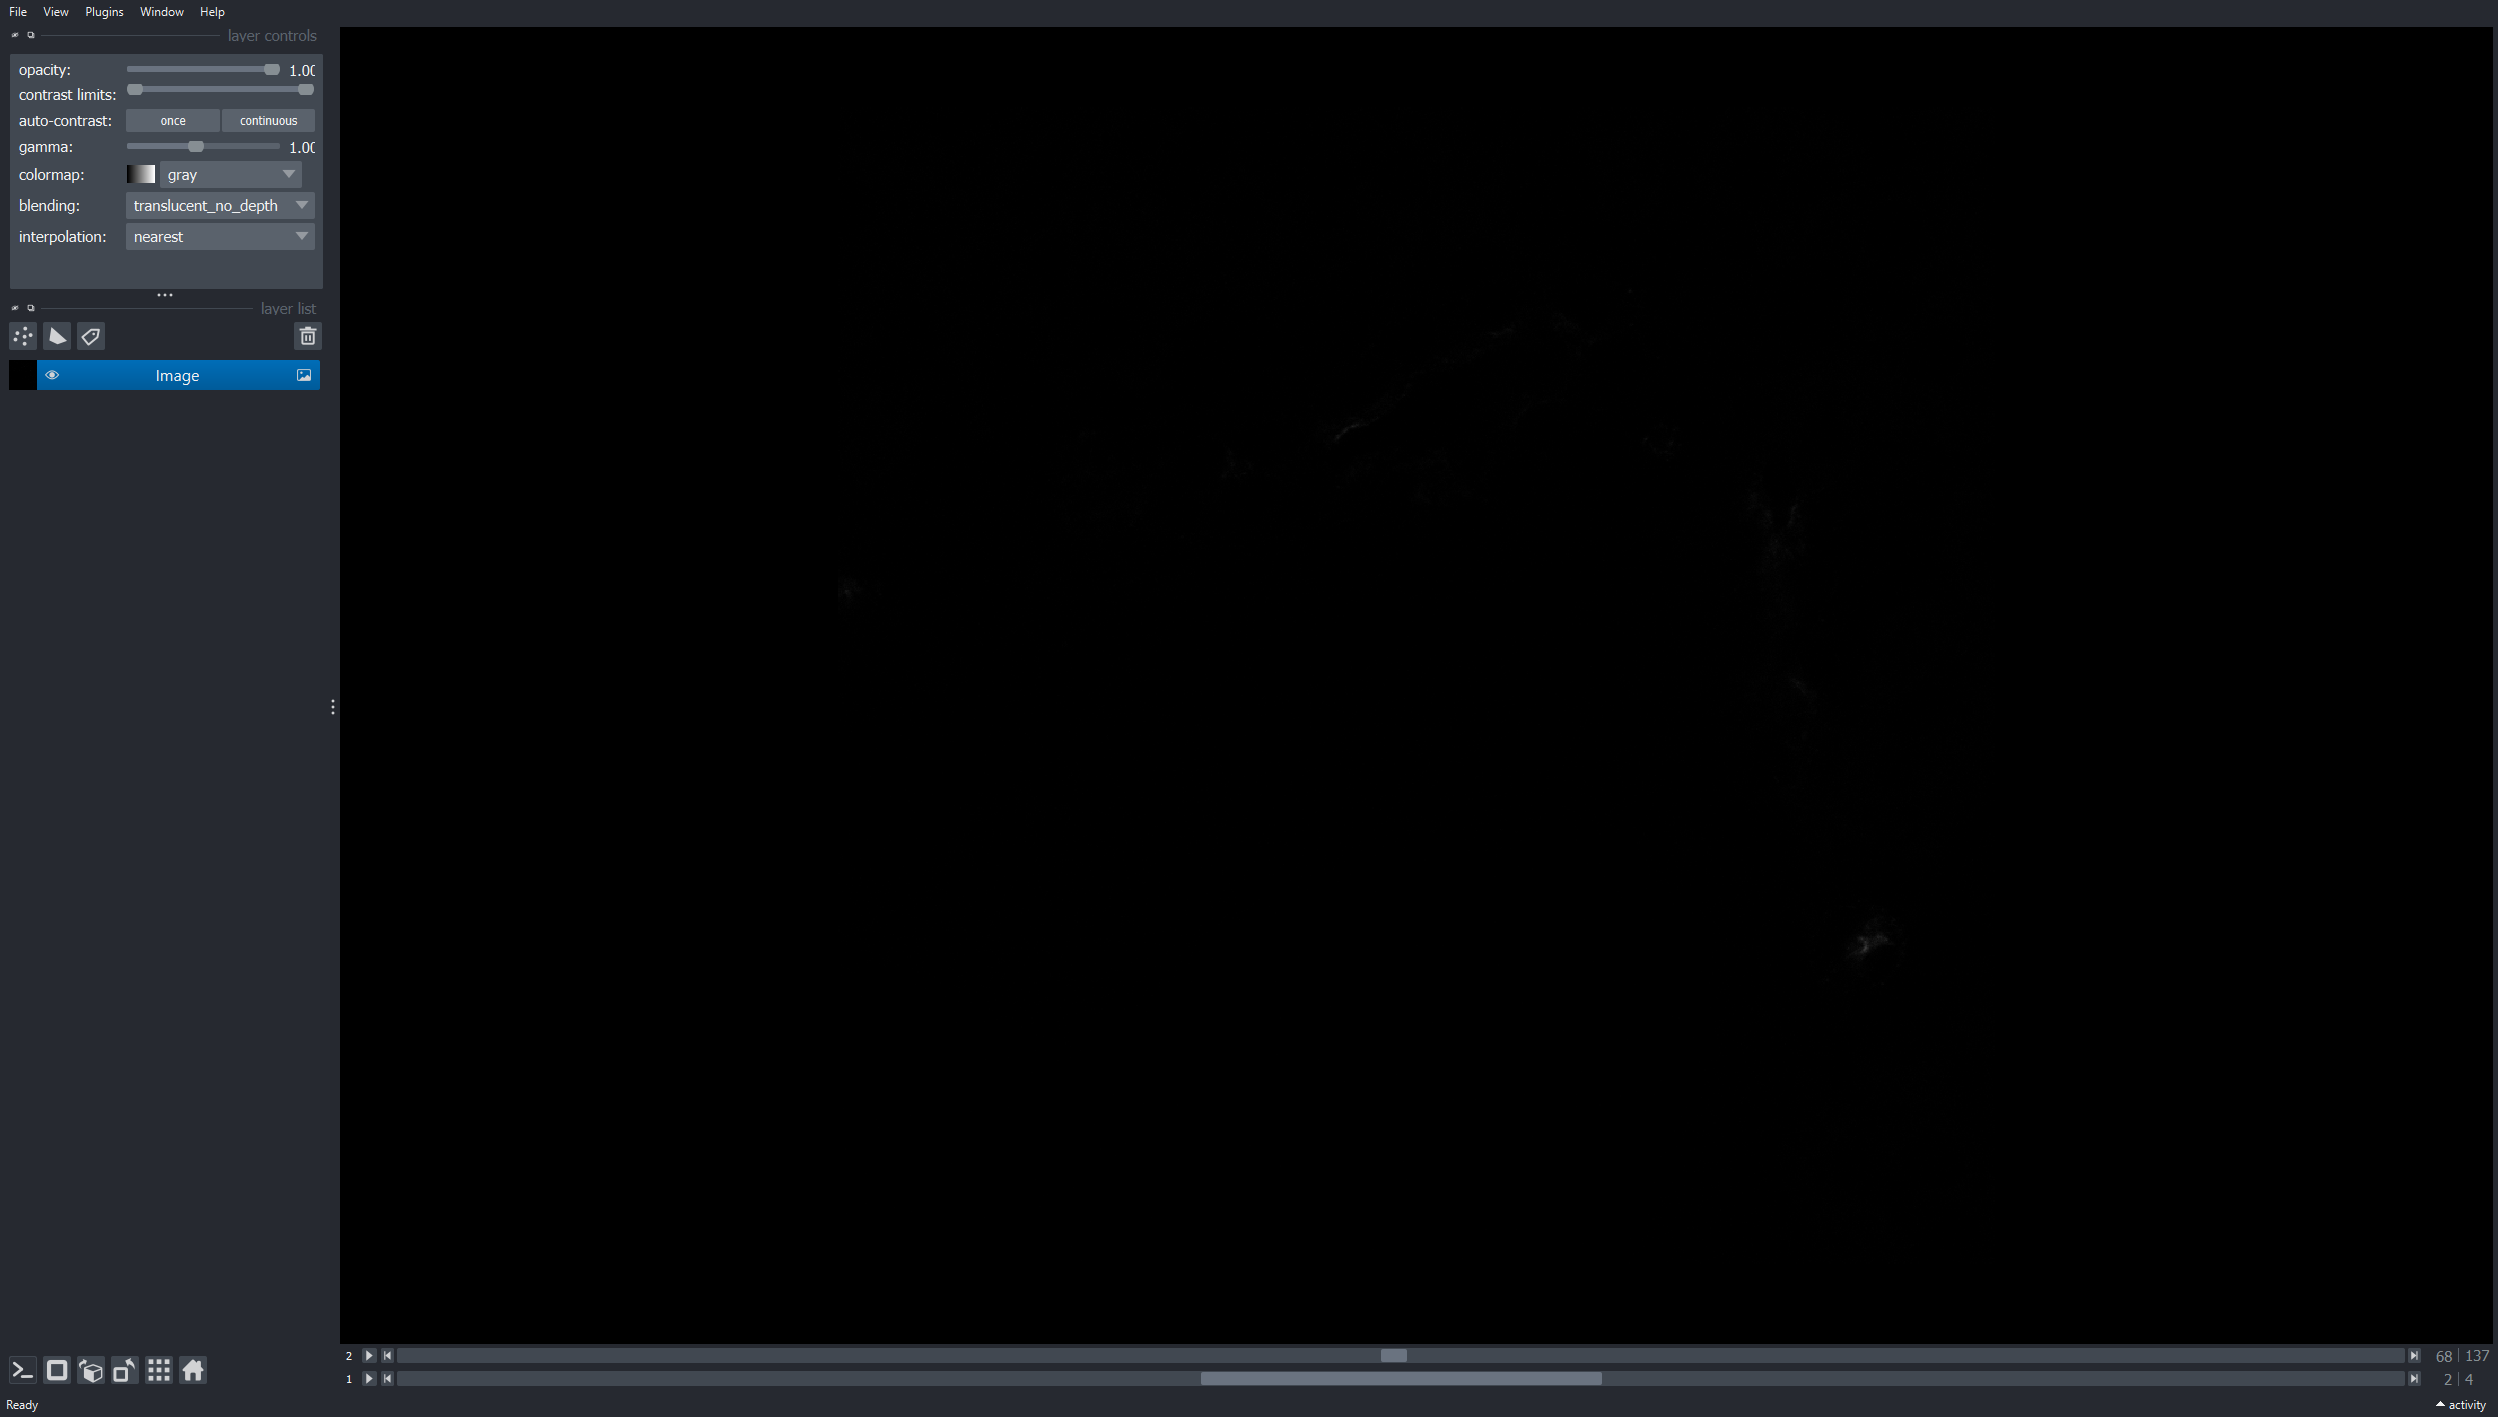

In [7]:
import napari

viewer = napari.view_image(file.dask_data)

napari.utils.nbscreenshot(viewer)

On the other hand, should you want to process a particular channel of the file, you can do it like the following.

In [8]:
from skimage.filters import gaussian

blurred_image = gaussian(file.dask_data[0][4], 5)

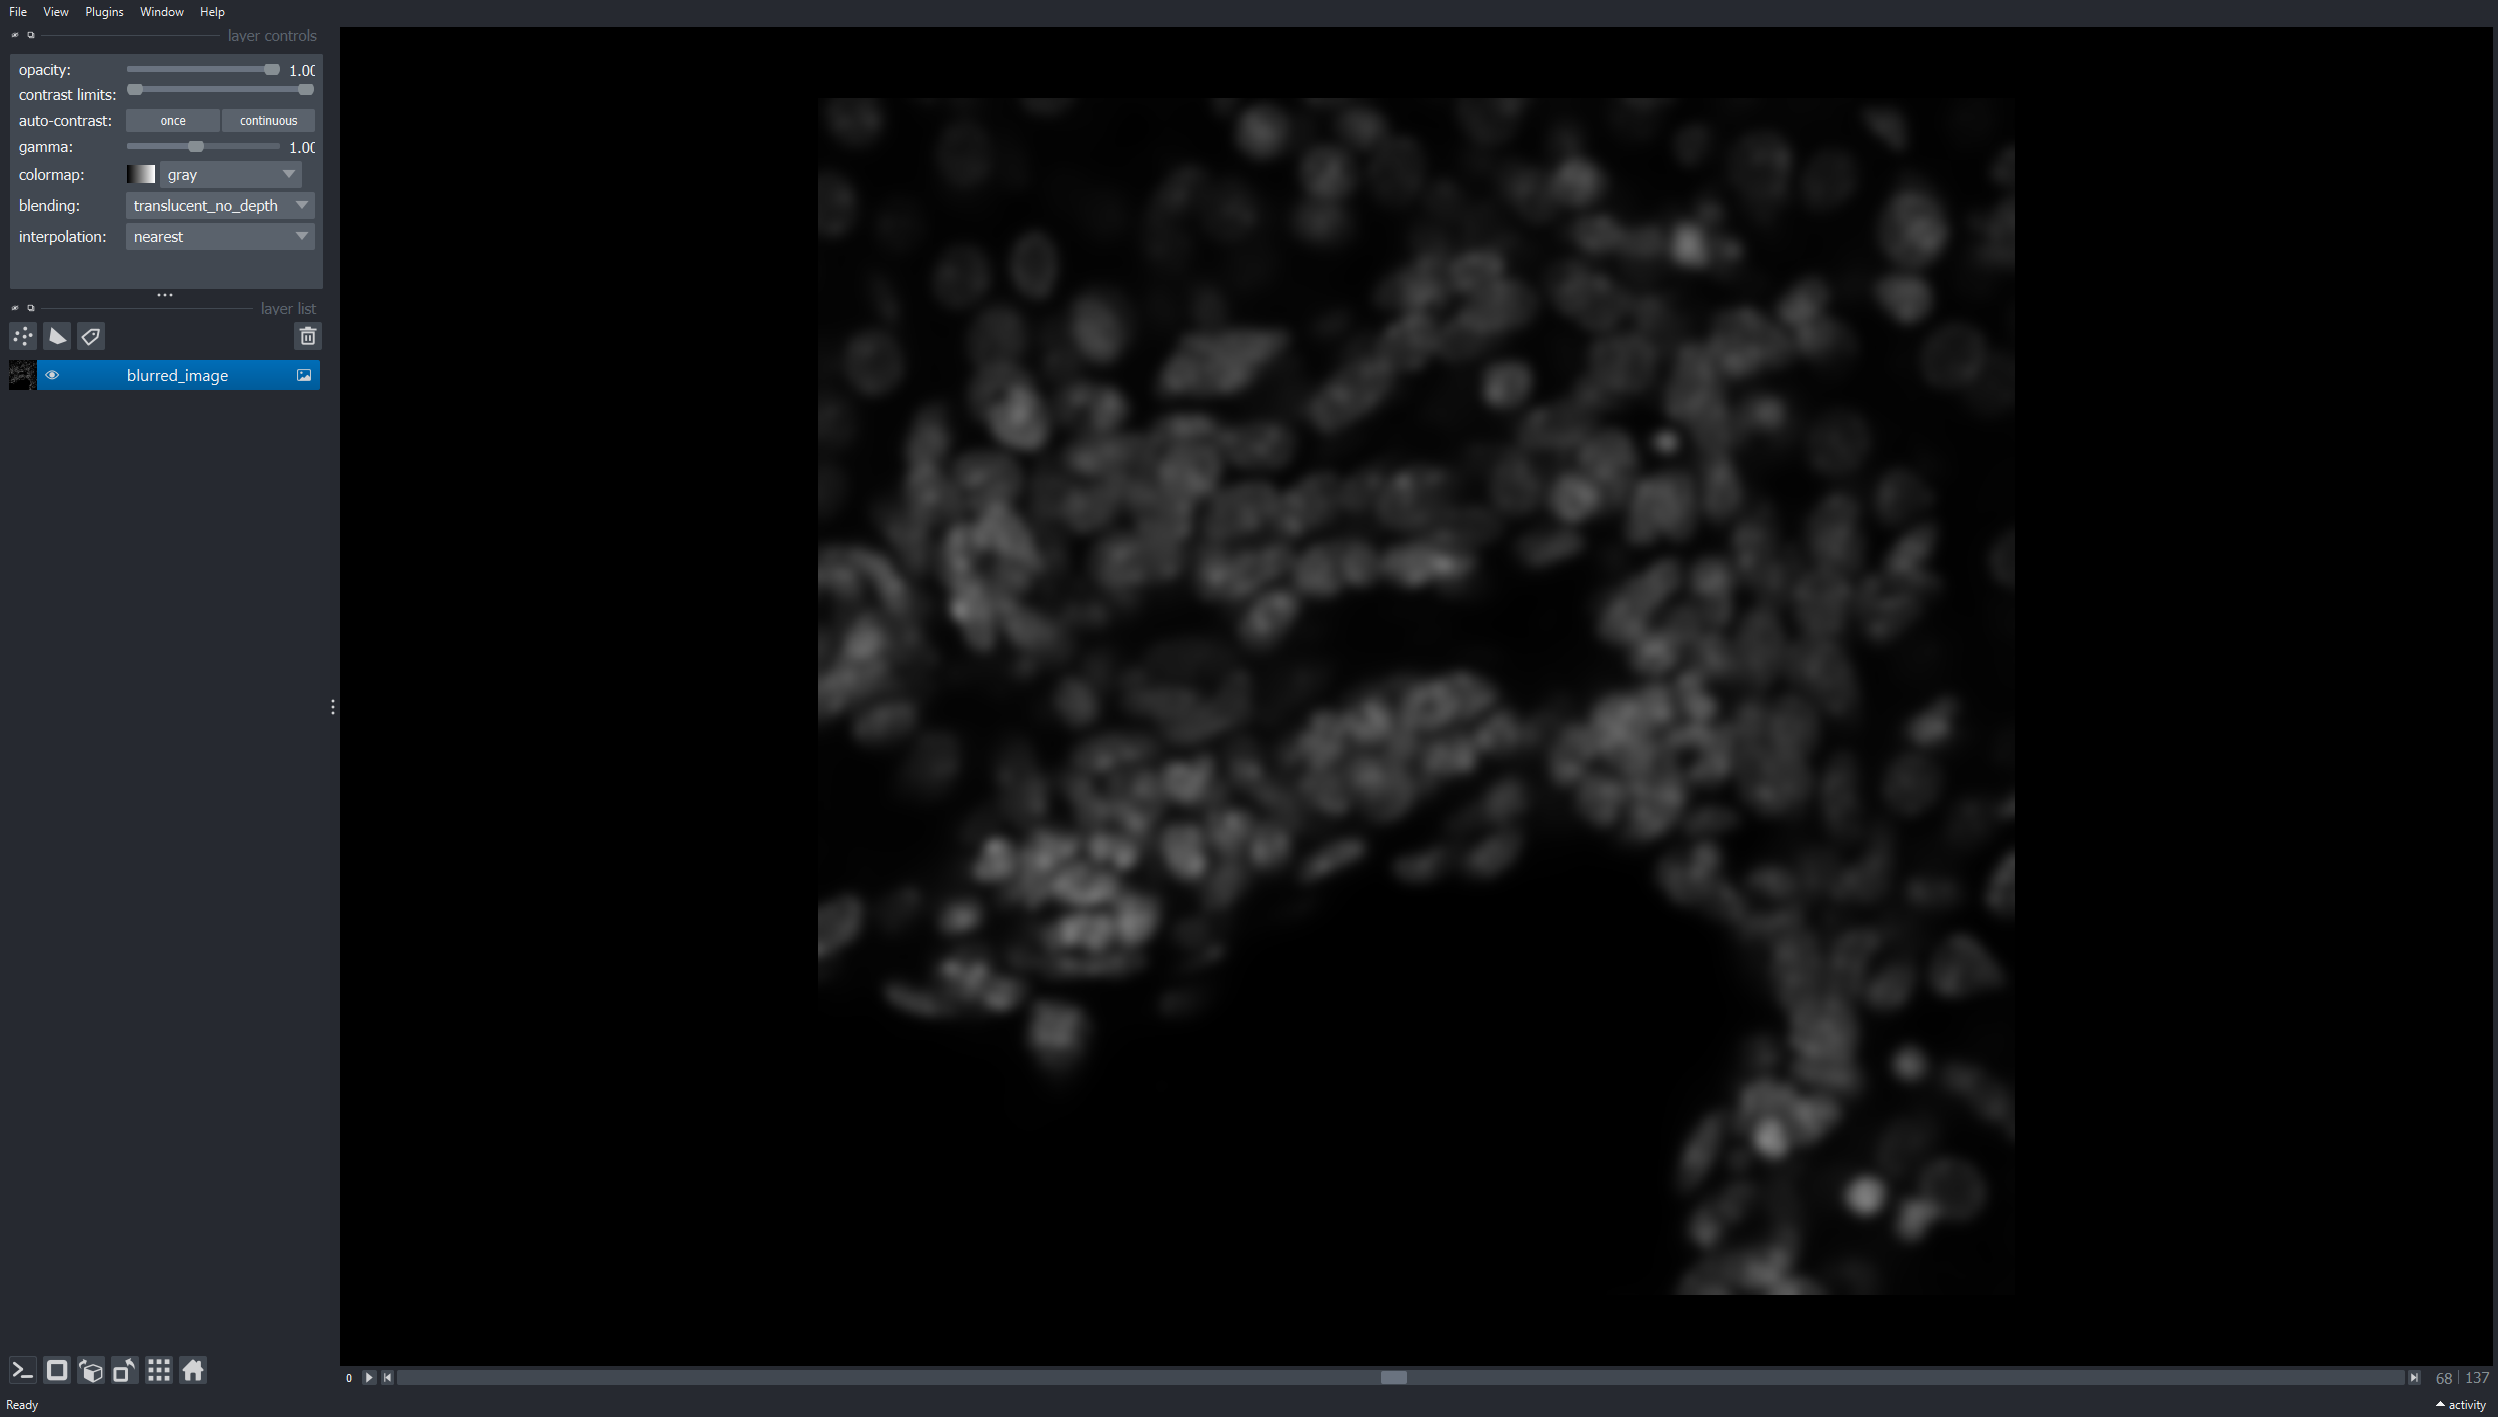

In [9]:
viewer = napari.view_image(blurred_image)

napari.utils.nbscreenshot(viewer)

In [10]:
from morphocilia.io import load_rescaled_channel

cilia_channel = load_rescaled_channel(filepath, "pos2_zstack", 4)

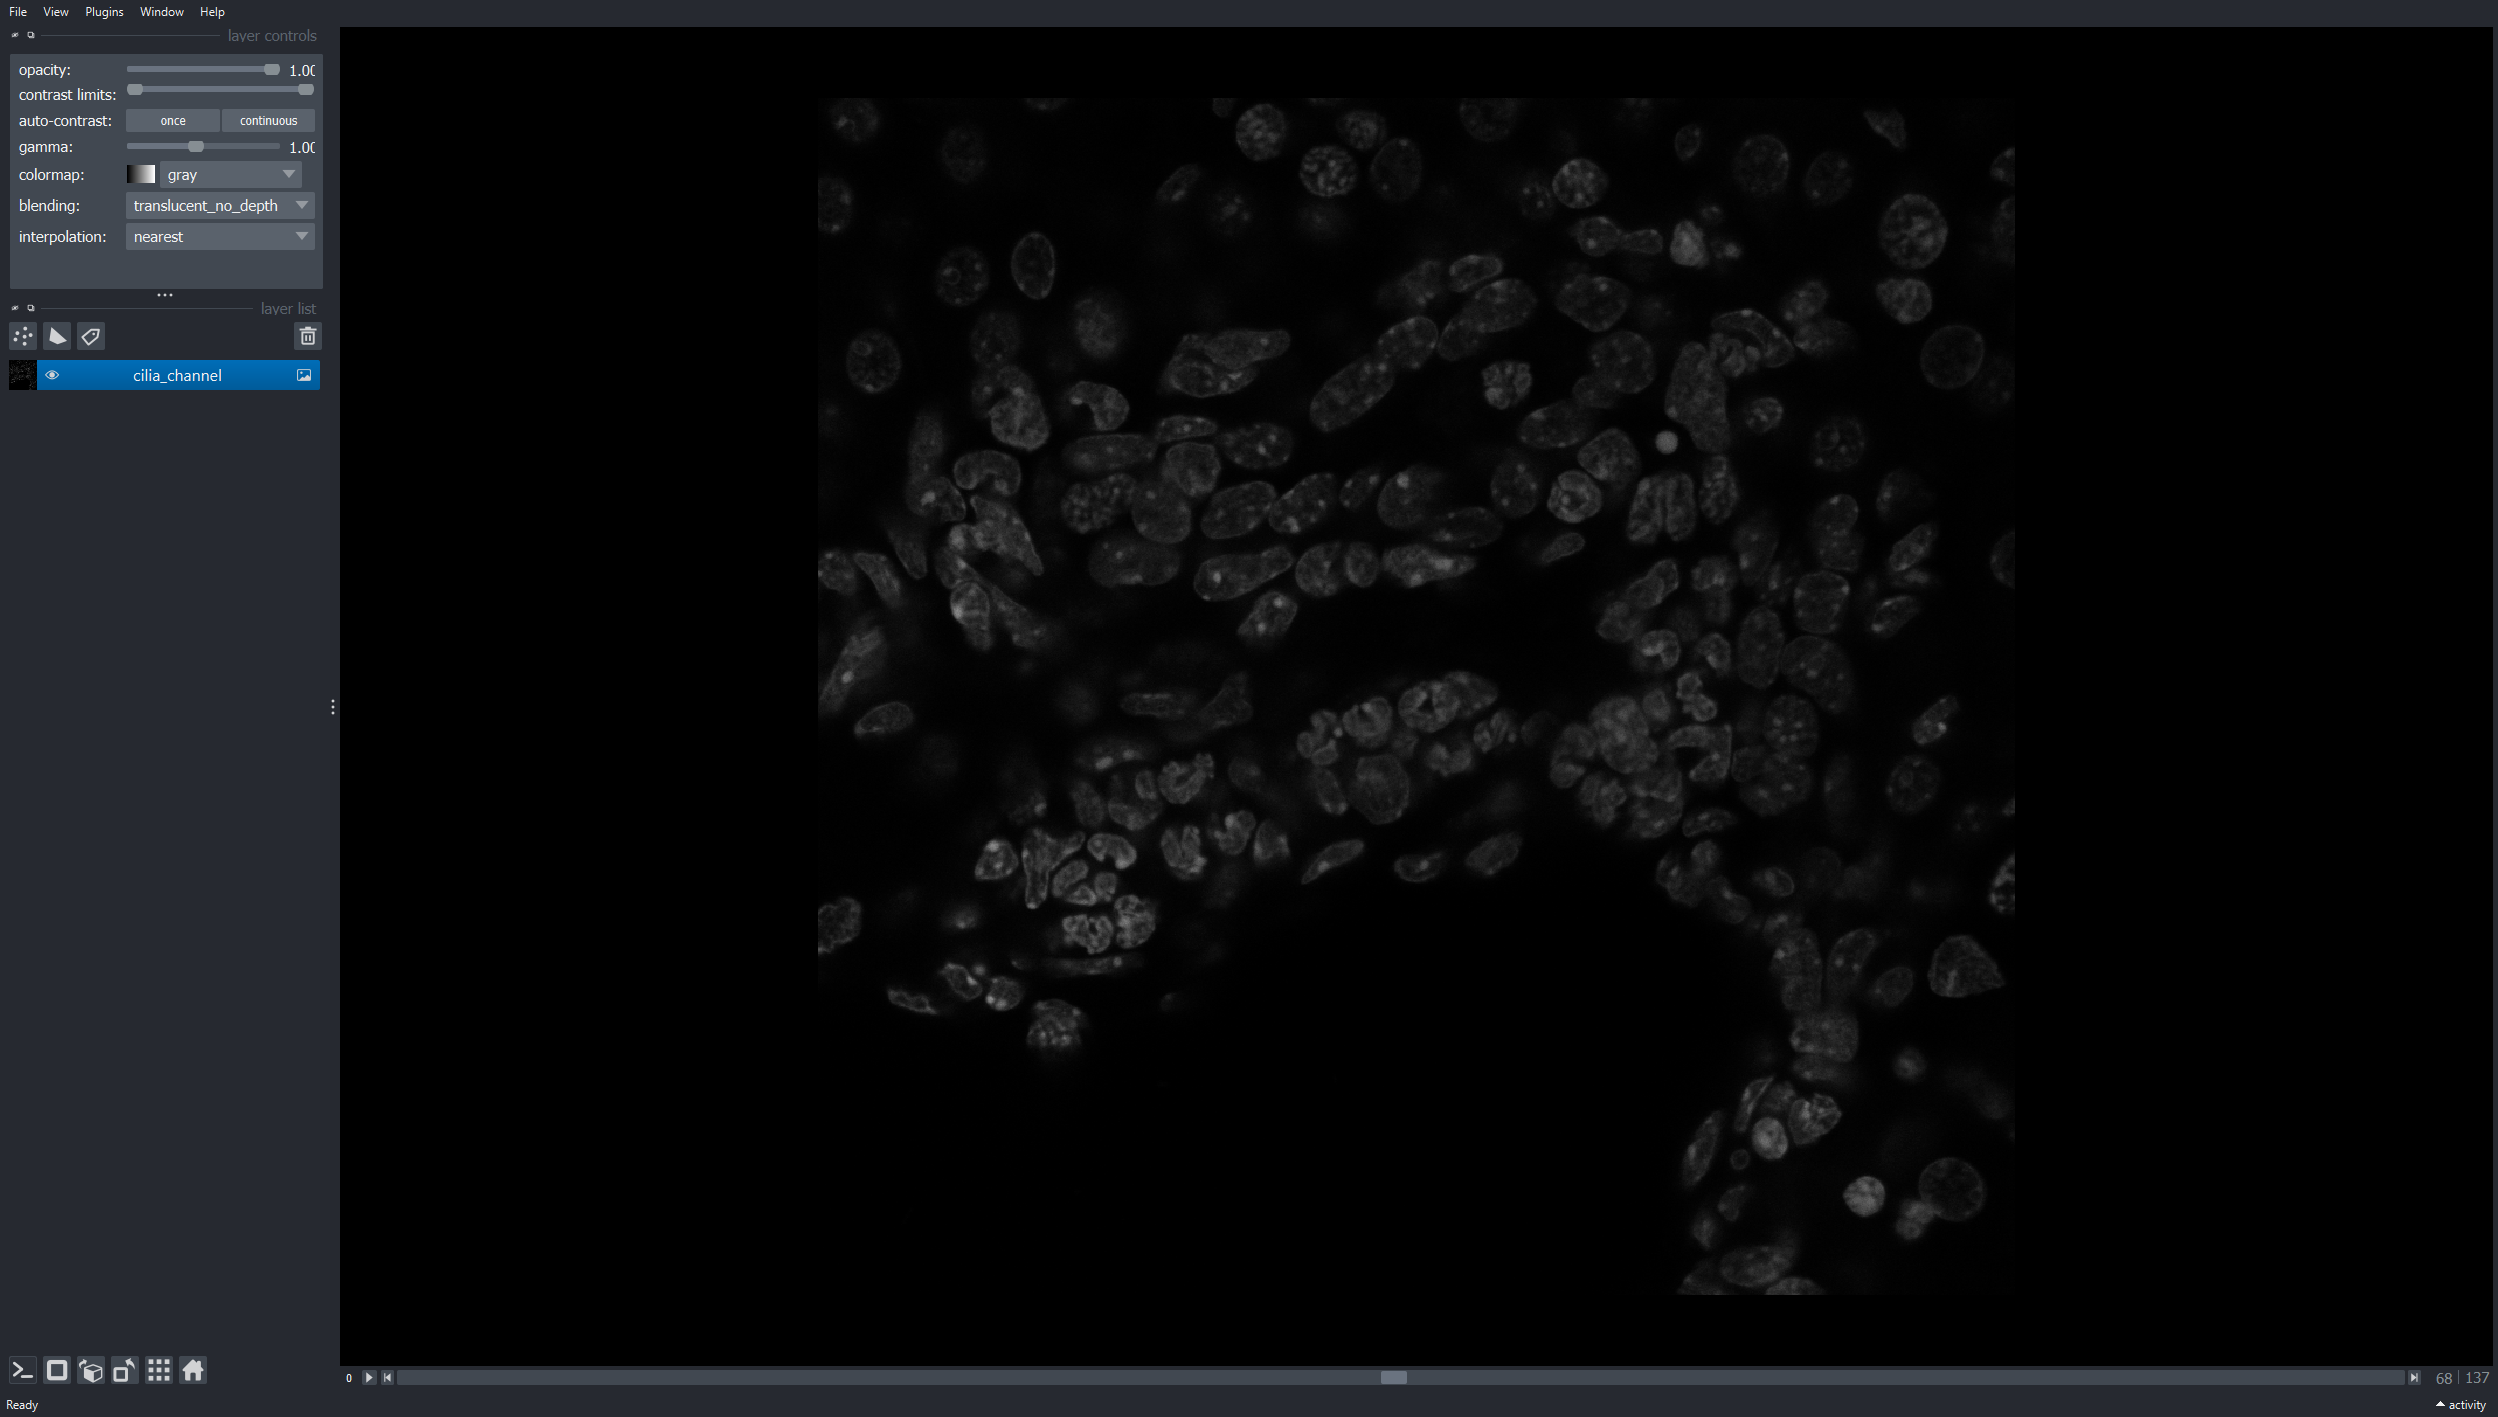

In [11]:
viewer = napari.view_image(cilia_channel)

napari.utils.nbscreenshot(viewer)